# Enhancements


In [1]:
# Importings

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Functions

def min_max(image, new_min, new_max):
    return ((image - image.min())*( (new_max - new_min)/(image.max() - image.min()) ) + new_min).astype(np.uint8)

def show(image, title, save, savetitle = None):
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.title(title)
    plt.show()
    if save:
        cv2.imwrite(savetitle + ".tif", min_max(image, 0, 255))

In [3]:
# Save outputs True/False

SAVE_OUTPUTS = True

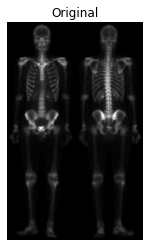

In [4]:
# Reading and displaying the image

skeleton = cv2.imread("skeleton.tif", 0)
show(skeleton, "Original", False)

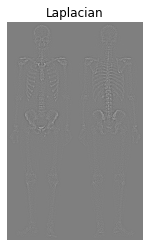

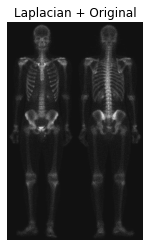

In [5]:
# Laplacian

laplacian_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

skeleton_laplacian = cv2.filter2D(skeleton, cv2.CV_16S, laplacian_mask)
skeleton_laplacian= min_max(skeleton_laplacian, 0, 255)

show(skeleton_laplacian, "Laplacian", SAVE_OUTPUTS, "laplacian")

skeleton_add_laplacian = skeleton + 0.5*skeleton_laplacian
show(skeleton_add_laplacian, "Laplacian + Original", SAVE_OUTPUTS, "laplacian_added")

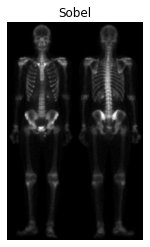

In [6]:
# Sobel

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [-1, -2, -1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

skeleton_x = cv2.filter2D(skeleton, cv2.CV_16S, sobel_x)
skeleton_y = cv2.filter2D(skeleton, cv2.CV_16S, sobel_y)

skeleton_sobel = np.absolute(skeleton_x) + np.absolute(skeleton_y)

show(skeleton_sobel, "Sobel", SAVE_OUTPUTS, "sobel")

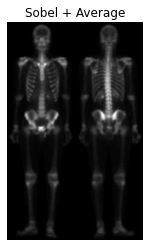

In [7]:
# Average filter

filter_size = 5
average_mask = (1/(filter_size**2))*np.ones((filter_size, filter_size))
skeleton_sobel_average = cv2.filter2D(skeleton_sobel, cv2.CV_16S, average_mask)

show(skeleton_sobel_average, "Sobel + Average", SAVE_OUTPUTS, "sobel_averaged")

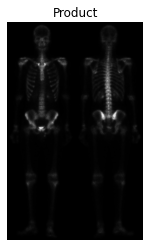

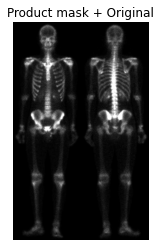

In [8]:
# Product

skeleton_product = (skeleton_add_laplacian/skeleton_add_laplacian.max())*(skeleton_sobel_average/skeleton_sobel_average.max())
show(skeleton_product, "Product", SAVE_OUTPUTS, "product")

skeleton_sum = 255*np.clip(skeleton/skeleton.max() + skeleton_product, 0, 1)
show(skeleton_sum, "Product mask + Original", SAVE_OUTPUTS, "product_added")

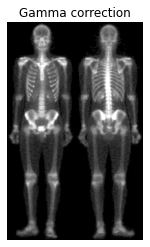

In [9]:
# Gamma correction

def gamma(x, gamma):
    x = np.uint8(x)
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    y = cv2.LUT(x, lookUpTable)
    return y

skeleton_gamma = gamma(skeleton_sum, 0.5)

show(skeleton_gamma, "Gamma correction", SAVE_OUTPUTS, "gamma")